In [759]:
#create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [760]:
#read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

#print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [761]:
# use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

#Show be all the values in the City column
summer_df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [762]:
#Create variables for the specific host country
host_country = 'Great Britain'
host_NOC = 'GBR'
host_year = 2012
host_city = 'London'

In [763]:
# create a dataframe for only the UK team in the Summer Olympics
host_df = summer_df[summer_df['NOC'] == host_NOC]

#View the dataframe
host_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN
786,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN
888,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN
889,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
890,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,NaN


In [764]:
# create a dataframe for the UK team in the Summer Olympics grouped by Games. 
games_df_host = host_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_host['gold_medals'] = host_df[host_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_host['silver_medals'] = host_df[host_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_host['bronze_medals'] = host_df[host_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# fill NaN values with 0
games_df_host = games_df_host.fillna(0)

# format values in all columns except Games to integers
games_df_host = games_df_host.astype(int)

#View the dataframe
games_df_host

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1896 Summer,9,3,3,3
1900 Summer,108,59,34,15
1904 Summer,2,1,1,0
1906 Summer,39,9,22,8
1908 Summer,368,147,131,90
1912 Summer,170,47,64,59
1920 Summer,111,52,42,17
1924 Summer,64,15,30,19


In [765]:
#Fitler and clean the data
std_df = games_df_host

std_df = std_df.rename(columns = {"Medal": "Total Medals"})
std_df = std_df.rename(columns = {"gold_medals": "Gold"})
std_df = std_df.rename(columns = {"silver_medals": "Silver"})
std_df = std_df.rename(columns = {"bronze_medals": "Bronze"})

#Remove the multi-index
std_df.columns = std_df.columns.droplevel(1)

#Move the Total Medals column to the end
std_df = std_df[['Gold', 'Silver', 'Bronze', 'Total Medals']]

#Filter the games to only include the years after 2000
std_df = std_df[std_df.index.str.contains('2004|2008|2012|2016')]

#Reset the index and sort by the column Games in ascending order
std_df = std_df.reset_index()

std_df

,Games,Gold,Silver,Bronze,Total Medals
0,2004 Summer,17,25,15,57
1,2008 Summer,31,25,25,81
2,2012 Summer,48,30,48,126
3,2016 Summer,64,55,26,145


In [766]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [767]:
#Clean the Data
#Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})
#Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

#Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == host_year]

summer_games_df.head()

,Country,Games,Year,Season,Sport,Event,Medal,Host
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
98,France,2012 Summer,2012,Summer,Athletics,"Athletics Men's 1,500 metres",NaN,London
134,Morocco,2012 Summer,2012,Summer,Boxing,Boxing Men's Light-Welterweight,NaN,London
164,Russia,2012 Summer,2012,Summer,Athletics,Athletics Women's Javelin Throw,NaN,London
174,France,2012 Summer,2012,Summer,Handball,Handball Men's Handball,Gold,London


In [768]:
#Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
1,China,2012,Summer,NaN,London
98,France,2012,Summer,NaN,London
134,Morocco,2012,Summer,NaN,London
164,Russia,2012,Summer,NaN,London
174,France,2012,Summer,Gold,London
...,...,...,...,...,...
271020,Hungary,2012,Summer,NaN,London
271023,Germany,2012,Summer,NaN,London
271052,Kazakhstan,2012,Summer,NaN,London
271090,Poland,2012,Summer,NaN,London


In [769]:
#create a new dataframe thatn removes all rows that have an Na in the medal column
host_year_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

host_year_medals_df

,Country,Year,Season,Medal,Host
174,France,2012,Summer,Gold,London
684,Canada,2012,Summer,Bronze,London
789,Russia,2012,Summer,Bronze,London
790,Russia,2012,Summer,Silver,London
861,Egypt,2012,Summer,Silver,London
...,...,...,...,...,...
270434,China,2012,Summer,Gold,London
270435,China,2012,Summer,Gold,London
270436,China,2012,Summer,Bronze,London
270440,China,2012,Summer,Gold,London


In [770]:
#create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
host_year_medal_countrys_df = host_year_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
host_year_medal_countrys_df['Gold'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Silver'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Bronze'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# fill NaN values with 0
host_year_medal_countrys_df = host_year_medal_countrys_df.fillna(0)

# format values in all columns except Games to integers
host_year_medal_countrys_df = host_year_medal_countrys_df.astype(int)

host_year_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Afghanistan,1,0,0,1
Algeria,1,1,0,0
Argentina,19,1,15,3
Armenia,3,0,1,2
Australia,114,18,37,59
...,...,...,...,...
United States,238,139,55,44
United States-1,8,6,0,2


In [771]:
#Sort the data by the total number of medals
host_year_sorted = host_year_medal_countrys_df.sort_values(by=('Medal', 'count'), ascending=False)

#Reset the index
host_year_sorted = host_year_sorted.reset_index()

#Fix the multi-index by removing the second level
host_year_sorted.columns = host_year_sorted.columns.droplevel(1)

#Rename the index to Rank
host_year_sorted.index.name = 'Rank'

#Start the index at 1
host_year_sorted.index = host_year_sorted.index + 1

#Change the column name from Medal to Total Medals
host_year_sorted = host_year_sorted.rename(columns = {"Medal": "Total Medals"})

# Move the Total Medals column to the end
host_year_sorted = host_year_sorted[['Country', 'Gold', 'Silver', 'Bronze', 'Total Medals']]

#Make Rank the first column
host_year_sorted = host_year_sorted.reset_index()

#View the dataframe
host_year_sorted

,Rank,Country,Gold,Silver,Bronze,Total Medals
0,1,United States,139,55,44,238
1,2,Russia,50,39,49,138
2,3,Great Britain,46,28,48,122
3,4,China,50,38,29,117
4,5,Australia,18,37,59,114
...,...,...,...,...,...,...
96,97,Gabon,0,1,0,1
97,98,Cyprus,0,1,0,1
98,99,Botswana,0,1,0,1
99,100,Bahrain,0,0,1,1


In [772]:
#Create a table of the top 15 countries by total medals for a specific year

# Define a function to highlight the host country
def highlight(nation):
    if nation['Country'] == 'Great Britain':
        return ['background-color: #add8e6; color: black']*6
    else:
        return ['background-color: white; color: black; border-top: 1px solid black']*6
    
# Define styles to hide the index and apply border
styles = [
    #dict(selector="th", props=[("display", "none")]),  # Hide the header row
    dict(selector=".row_heading", props=[("display", "none")]),  # Hide the index column
    dict(selector=".blank", props=[("display", "none")]),  # Hide any blank cells
    dict(selector="tr", props=[("border", "1px solid black"), ("padding", "10px"), ("font-size", "10pt")]),  # Apply border, padding, and larger font
    #dict(selector="th", props=[("border", "1px solid black"), ("padding", "10px"), ("font-size", "10pt")]),  # Apply border, padding, and larger font
]    

# Create a styled dataframe
styled_df = host_year_sorted[['Rank', 'Country', 'Bronze', 'Silver', 'Gold', 'Total Medals']].iloc[:15] \
    .style \
    .set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]') \
    .set_table_styles(styles) \
    .bar(subset=['Gold'], color='#f0c05a') \
    .bar(subset=['Silver'], color='Lightgray') \
    .bar(subset=['Bronze'], color='#a97142') \
    .hide(axis="index").apply(highlight, axis=1)

# Save the styled dataframe to a html file
styled_df.to_html('resources/medals_by_country.html')

# Display the styled dataframe
styled_df

Rank,Country,Bronze,Silver,Gold,Total Medals
1,United States,44,55,139,238
2,Russia,49,39,50,138
3,Great Britain,48,28,46,122
4,China,29,38,50,117
5,Australia,59,37,18,114
6,Germany,22,27,43,92
7,Japan,33,42,7,82
8,France,20,28,30,78
9,Netherlands,19,29,21,69
10,Italy,30,22,16,68


In [773]:
#Create a new dataframe that only has your country as the host city
hosting_summer_df = summer_df[summer_df["City"] == host_city]
hosting_summer_df = hosting_summer_df[hosting_summer_df["NOC"] == host_NOC]

#Drop Unnecessary Columns
hosting_summer_medals_df = hosting_summer_df.drop(columns = ["Name", "Sex", "Age", "ID", "Height", "Weight","Games", "Sport", "Event"])

hosting_summer_medals_df = hosting_summer_medals_df.dropna(subset = ["Medal"]) 

#Reset the index
hosting_summer_medals_df = hosting_summer_medals_df.reset_index(drop=True)

#Group the date by year and medal
hosting_summer_medals_df = hosting_summer_medals_df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

#Sum the values in Bronze, Gold, and Silver into a Total Medals column
hosting_summer_medals_df['Total Medals'] = hosting_summer_medals_df.sum(axis=1)

#Give the average number of medals won by year
avg_hosting_summer_medals_df = hosting_summer_medals_df['Total Medals'].mean()

avg_hosting_summer_medals_df

185.0

In [774]:
#Create a new dataframe that only has London as the host city
nonhosting_summer_df = summer_df[summer_df["City"] != host_city]
nonhosting_summer_df = nonhosting_summer_df[nonhosting_summer_df["NOC"] == host_NOC]

#Drop Unnecessary Columns
nonhosting_summer_medals_df = nonhosting_summer_df.drop(columns = ["Name", "Sex", "Age", "ID", "Height", "Weight","Games", "Sport", "Event"])

nonhosting_summer_medals_df = nonhosting_summer_medals_df.dropna(subset = ["Medal"]) 

#Reset the index
nonhosting_summer_medals_df = nonhosting_summer_medals_df.reset_index(drop=True)

#Group the date by year and medal
nonhosting_summer_medals_df = nonhosting_summer_medals_df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

#Sum the values in Bronze, Gold, and Silver into a Total Medals column
nonhosting_summer_medals_df['Total Medals'] = nonhosting_summer_medals_df.sum(axis=1)

#Give the average number of medals won by year
avg_nonhostingsummer_medals_df = nonhosting_summer_medals_df['Total Medals'].mean()

#View the dataframe
avg_nonhostingsummer_medals_df

55.0

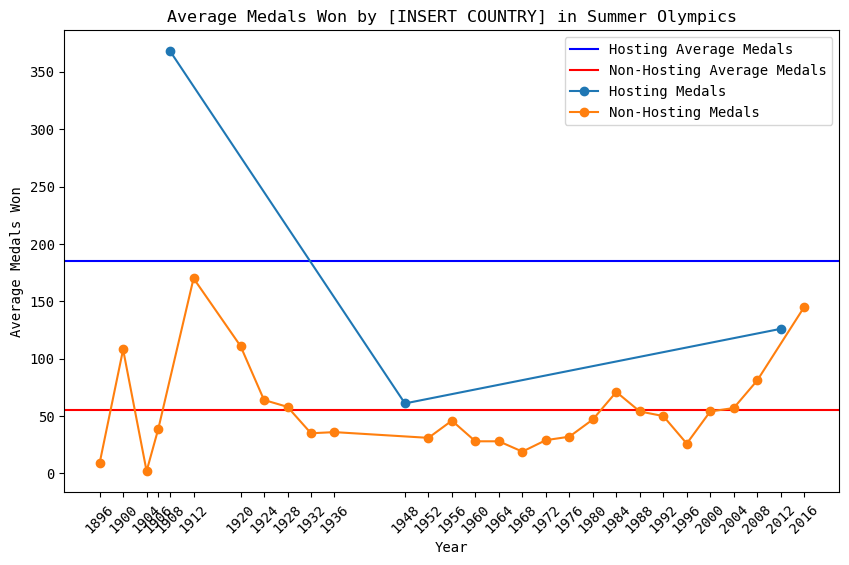

In [775]:
#Create an mlines chart to show the avg_hosting_summer_medals_df and avg_nonhosting_summer_medals_df
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Create a line for the average number of medals won in London
ax.axhline(y=avg_hosting_summer_medals_df, color='b', linestyle='-', label='Hosting Average Medals')

# Create a line for the average number of medals won in non-London
ax.axhline(y=avg_nonhostingsummer_medals_df, color='r', linestyle='-', label='Non-Hosting Average Medals')


# Set the title and labels
ax.set_title('Average Medals Won by [INSERT COUNTRY] in Summer Olympics')
ax.set_xlabel('Year')
ax.set_ylabel('Average Medals Won')

# Merge the two DataFrames into a single DataFrame that includes all years
all_years_df = pd.concat([hosting_summer_medals_df, nonhosting_summer_medals_df])

# Set the x-axis to be the years
x = all_years_df.index.unique()
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)

# Plot the data
ax.plot(hosting_summer_medals_df.index, hosting_summer_medals_df['Total Medals'], label='Hosting Medals', marker='o')
ax.plot(nonhosting_summer_medals_df.index, nonhosting_summer_medals_df['Total Medals'], label='Non-Hosting Medals', marker='o')

# Add a legend
ax.legend()

# Save the figure
plt.savefig('resources/avg_medals.png')

# Show the plot
plt.show()